In [63]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [64]:
def apply_smoothing(image, kernel_size):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0), cv2.medianBlur(image, kernel_size)

In [65]:
image = cv2.imread('512x512(6).png', cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (512, 512))

In [66]:
kernel_size=9
smoothed_image_gaussian, smoothed_image_median = apply_smoothing(image, kernel_size)

In [67]:
noise_gaussian = image - smoothed_image_gaussian
noise_median = image - smoothed_image_median

In [68]:
def calculate_variance_and_snr(image):
    variance = np.var(image)
    mean, std_dev = cv2.meanStdDev(image)
    snr = mean / std_dev
    return variance, snr[0][0]

variance_original, snr_original = calculate_variance_and_snr(image)
variance_gaussian, snr_gaussian = calculate_variance_and_snr(smoothed_image_gaussian)
variance_median, snr_median = calculate_variance_and_snr(smoothed_image_median)

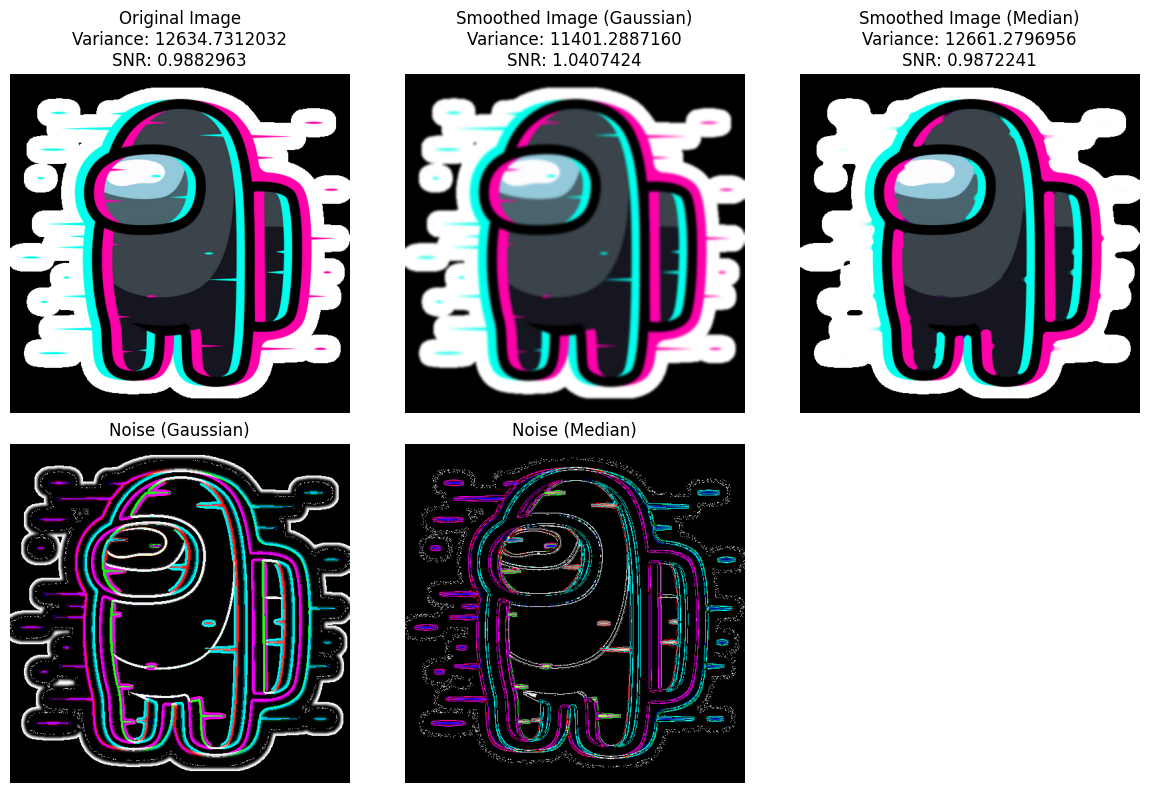

In [69]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image\nVariance: {:.7f}\nSNR: {:.7f}'.format(variance_original, snr_original))
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(cv2.cvtColor(smoothed_image_gaussian, cv2.COLOR_BGR2RGB))
plt.title('Smoothed Image (Gaussian)\nVariance: {:.7f}\nSNR: {:.7f}'.format(variance_gaussian, snr_gaussian))
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(cv2.cvtColor(smoothed_image_median, cv2.COLOR_BGR2RGB))
plt.title('Smoothed Image (Median)\nVariance: {:.7f}\nSNR: {:.7f}'.format(variance_median, snr_median))
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(cv2.cvtColor(noise_gaussian, cv2.COLOR_BGR2RGB))
plt.title('Noise (Gaussian)')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(cv2.cvtColor(noise_median, cv2.COLOR_BGR2RGB))
plt.title('Noise (Median)')
plt.axis('off')

plt.tight_layout()
plt.show()